**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2024 &#x25aa; Uhan**

# Lesson 25. Conditions for Logistic Regression

## Overview

* Model (logit form):

    $$ \log \left( \frac{\pi}{1 - \pi} \right) = \beta_ 0 + \beta_1 X \qquad \pi = P(Y = 1) $$ 

    * $Y$ = binary response variable
    * $X$ = explanatory variable, quantitative or categorical

* We have three conditions to check for logistic regression:

    1. __Randomness__ &nbsp;&larr;&nbsp; think about data collection
    2. __Independence__ &nbsp;&larr;&nbsp; think about data collection
    3. __Linearity__ &nbsp;&larr;&nbsp; check with a plot

## Randomness

* It needs to make sense that for a given predictor value, __the outcome is random__
    * Specifically, the outcome needs to be approximately Bernoulli<br><br>
* Random sampling and randomized assignment are the gold standard

### Example 1

Recall the `MedGPA` data and scenario from previous lessons...

The data stored in `MedGPA` contains information about 55 medical school applicants from a liberal arts college in the Midwest. In particular, for each applicant, we have whether they were accepted to medical school ($\mathit{Acceptance}$ = 1 if accepted, 0 if denied) and their $\mathit{GPA}$.

Suppose we want to predict $\mathit{Acceptance}$ based on $\mathit{GPA}$ using a logistic regression model.

Is randomness satisfied here?

*Write your notes here. Double-click to edit.*

*Solution.*

- The answer is a bit complex. As a first pass, we might think:

    1. Students who apply to medical school are not a random sample from the population of US college students. Therefore, in this sense, the sample is not random.

    2. Medical schools do not choose students at random, even among those with the same GPA. Therefore, the outcome (assignment to Yes or No) is not random.

- However, we could consider a different way of looking at this:

    1. Is there a reasonable population from which these students could be viewed as a random sample? The students in this sample are plausibly random from the population of students _from similar liberal arts colleges applying to medical school in the recent past_. 

    2. Is it plausible that a random model (think a spinner divided into Yes and No regions) could generate the outcomes in the data for all students with the same GPA? In this case, yes. 

- On balance, we could argue in this case that randomness is plausible.

## Independence

- The outcomes need to be independent after accounting for the predictor value

- Are the observational units related to each other?

- Common things to consider:
    - __Time.__ Are the results from a time-ordered process? If so, is it reasonable to think that one outcome does not influence the next outcome in the sequence?
    - __Space.__ If your observational units have a spatial relationship, is it reasonable to think that the outcome for one unit is independent of the nearby units?
    - __The yes/no decision.__ Are the yes/no decisions subjective? Do they depend on each other?

### Example 2

Going back to Example 1... Is independence satisfied here? 

*Write your answer here. Double-click to edit.*

*Solution.*

- Acceptance decisions are not independent: medical schools have limited number of seats.

- But... there are hundreds of medical schools and thousands of medical school spots.

- If you get into Georgetown, that probably doesn't have much effect on your friend's chances of getting into Johns Hopkins.

- So, independence is plausible in this case.

## Linearity

* In the logistic model, $\text{logit}(\pi) = \log\left(\frac{\pi}{1 - \pi}\right)$ has a linear relationship with the explanatory variable

* We will plot the _empirical logits_ (i.e., logits based on observed values) versus the explanatory variable to check for linearity

* The __empirical logit__ is

    $$ \text{logit}(\hat{p}) = \log\left(\frac{\hat{p}}{1 - \hat{p}}\right) $$

    * Recall that $\hat{p}$ is the estimated "unconstrained" probability:
        
        $$ \hat{p} = \frac{\#(Y = 1)}{\#(Y = 1) + \#(Y = 0)} $$

### Case 1. Binary predictor

1. With a binary predictor, the empirical logit plot only has two points, so the model fits a line to them exactly.

2. Therefore, the linearity condition is automatically met.

### Case 2. Quantitative predictor

1. Divide the range of $X$ into intervals with roughly equal numbers of observations.

2. Compute $\hat{p}$ for each interval.

3. Compute $\text{logit}(\hat{p})$ for each interval.

4. Plot $\text{logit}(\hat{p})$ versus the mean predictor value for each interval (i.e., one point per interval). Assess whether you see a linear trend.

* We can use R to do most of the steps above for us, with the `emplogitplot1()` function from the `Stat2Data` library

### Example 3

Going back to Example 1... Is linearity satisfied here?

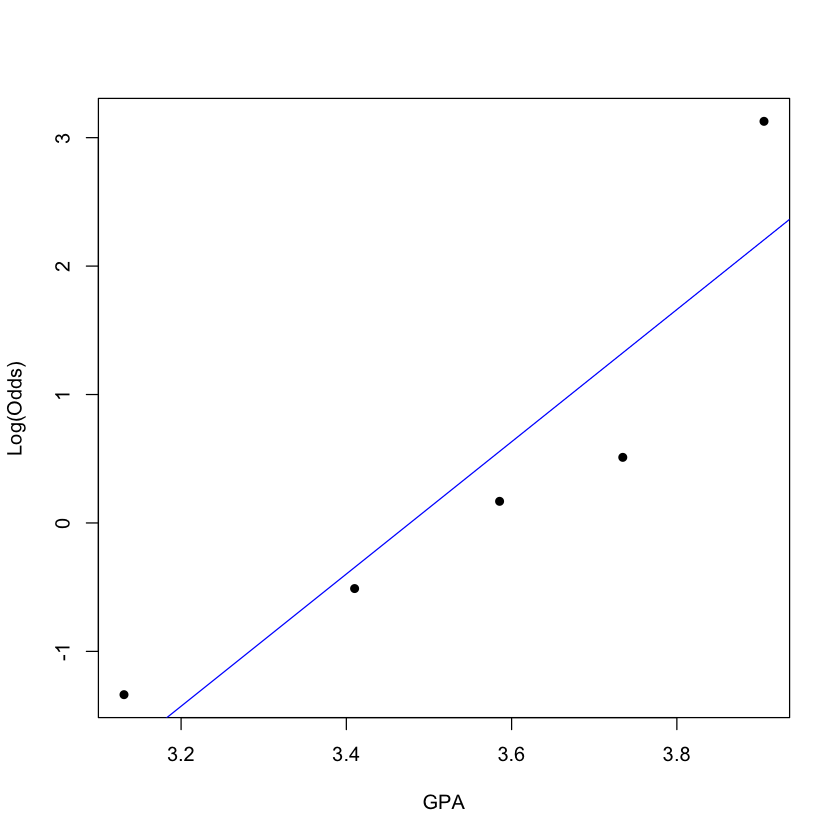

In [5]:
# Solution
library(Stat2Data)
data(MedGPA)

emplogitplot1(Acceptance ~ GPA, data = MedGPA, ngroups = 5)

*Write your notes here. Double-click to edit.*

*Solution.*  Based on the empirical logit plot, linearity seems reasonable: the plot is approximately linear. 

* Note that we can control the number of intervals, or groups, using the `ngroups = ... ` keyword argument

* How many intervals should you use? If you have enough cases, at least four or five intervals
    - Two intervals will only give you a sense of the direction and size of the relationship
    - Three intervals will also give you an indication of departures from linearity, but not much information about whether the departure is systematic or chance-like

## After checking the conditions...


* If linearity is not met, we could try a __transformation__ on the quantitative predictor

* As long as __linearity__ is met, we can use the model for describing patterns 

* If all the conditions are met, we can do __inference__ such as conducting hypothesis tests and constructing CIs
    - We will cover this in the next lesson...